In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import geopandas as gpd
import geodatasets
import os 
import sys

In [3]:
plt.style.use("styler.mplstyle") 

### Pre Processing

In [4]:
df = pd.read_csv('../data/plant_data.csv')

/tmp/ipykernel_11150/3742021595.py:1: DtypeWarning: Columns (0,1,4,6,8,16,17,19,20,22,23,27,29,33,34,35,50,51,52,53,55,56,58,59,60,61,62,63,64,65,66,67,68,69,71,72,74,82,85,86,97,98,99,102,107,122) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/plant_data.csv')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12613 entries, 0 to 12612
Columns: 150 entries, Plant file sequence number to Plant total noncombustion other unknown/purchased generation percent (resource mix)
dtypes: object(150)
memory usage: 14.4+ MB


In [6]:
print(len(df))

12613


In [7]:
df.head()

,Plant file sequence number,Data Year,Plant state abbreviation,Plant name,DOE/EIA ORIS plant or facility code,Plant transmission or distribution system owner name,Plant transmission or distribution system owner ID,Utility name,Utility ID,Plant-level sector,...,Plant geothermal generation percent (resource mix),Plant other fossil generation percent (resource mix),Plant other unknown / purchased fuel generation percent (resource mix),Plant total nonrenewables generation percent (resource mix),Plant total renewables generation percent (resource mix),Plant total nonrenewables other unknown/purchased generation percent (resource mix),Plant total nonhydro renewables generation percent (resource mix),Plant total combustion generation percent (resource mix),Plant total noncombustion generation percent (resource mix),Plant total noncombustion other unknown/purchased generation percent (resource mix)
0,SEQPLT23,YEAR,PSTATABB,PNAME,ORISPL,OPRNAME,OPRCODE,UTLSRVNM,UTLSRVID,SECTOR,...,PLGTPR,PLOFPR,PLOPPR,PLTNPR,PLTRPR,PLTOPR,PLTHPR,PLCYPR,PLCNPR,PLCOPR
1,1,2023,AK,Alakanuk,57053,"Alaska Village Elec Coop, Inc",221,"Alaska Village Elec Coop, Inc",221,Electric Utility,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2023,AK,Allison Creek Hydro,58982,"Copper Valley Elec Assn, Inc",4329,"Copper Valley Elec Assn, Inc",4329,Electric Utility,...,0.0%,0.0%,0.0%,0.0%,100.0%,0.0%,0.0%,0.0%,100.0%,0.0%
3,3,2023,AK,Ambler,60243,"Alaska Village Elec Coop, Inc",221,"Alaska Village Elec Coop, Inc",221,Electric Utility,...,0.0%,0.0%,0.0%,100.0%,0.0%,0.0%,0.0%,100.0%,0.0%,0.0%
4,4,2023,AK,Angoon,7462,"Inside Passage Elec Coop, Inc",18963,"Inside Passage Elec Coop, Inc",18963,Electric Utility,...,0.0%,0.0%,0.0%,100.0%,0.0%,0.0%,0.0%,100.0%,0.0%,0.0%


In [8]:

for i in df.columns:
    print(i)

Plant file sequence number
Data Year
Plant state abbreviation
Plant name
DOE/EIA ORIS plant or facility code
Plant transmission or distribution system owner name
Plant transmission or distribution system owner ID
Utility name
Utility ID
Plant-level sector
Balancing Authority Name
Balancing Authority Code
NERC region acronym
eGRID subregion acronym
eGRID subregion name
Plant associated ISO/RTO Territory
Plant FIPS state code
Plant FIPS county code
Plant county name
Plant latitude
Plant longitude
CAPD Program Flag
Number of units
Number of generators
Plant primary fuel
Plant primary fuel category
Flag indicating if the plant burned or generated any amount of coal
Plant capacity factor
Plant nameplate capacity (MW)
Nonbaseload Factor
Biogas/ biomass plant adjustment flag
Combined heat and power (CHP) plant adjustment flag
CHP plant useful thermal output (MMBtu)
CHP plant power to heat ratio
CHP plant electric allocation factor
Plant pumped storage flag
Plant annual heat input from combust

In [9]:
df['Balancing Authority Name']

0                                                   BANAME
1                              No balancing authority - AK
2                              No balancing authority - AK
3                              No balancing authority - AK
4                              No balancing authority - AK
                               ...                        
12608                                    PacifiCorp - East
12609    Western Area Power Administration - Rocky Moun...
12610    Western Area Power Administration - Rocky Moun...
12611    Western Area Power Administration - Rocky Moun...
12612                                    PacifiCorp - East
Name: Balancing Authority Name, Length: 12613, dtype: object

Important Columns

In [10]:
resource_cols = [
                'Plant annual coal net generation (MWh)',
                'Plant annual oil net generation (MWh)',
                'Plant annual gas net generation (MWh)',
                'Plant annual nuclear net generation (MWh)',
                'Plant annual hydro net generation (MWh)',
                'Plant annual biomass net generation (MWh)',
                'Plant annual wind net generation (MWh)',
                'Plant annual solar net generation (MWh)',
                'Plant annual geothermal net generation (MWh)'
                ]

In [11]:
plant_info = [
    'Plant state abbreviation',
    'Plant name', 
    'Plant transmission or distribution system owner name',
    'Plant longitude',
    'Plant latitude',
    'Plant primary fuel'
]

Preprocessing

In [12]:

keep_cols = plant_info + resource_cols
df = df[keep_cols]

for c in df.columns:
    df[c] = pd.to_numeric(df[c], errors="coerce").fillna(0.0)

Idenitfy top producing power plants for each resource 

In [13]:

for col in resource_cols: 
    df[f'{col}_rank'] = (
    df[col]
    .where(df[col] != 0)                
    .rank(method='dense', ascending=False)  
    .fillna(0)
)


In [14]:
df

,Plant state abbreviation,Plant name,Plant transmission or distribution system owner name,Plant longitude,Plant latitude,Plant primary fuel,Plant annual coal net generation (MWh),Plant annual oil net generation (MWh),Plant annual gas net generation (MWh),Plant annual nuclear net generation (MWh),...,Plant annual geothermal net generation (MWh),Plant annual coal net generation (MWh)_rank,Plant annual oil net generation (MWh)_rank,Plant annual gas net generation (MWh)_rank,Plant annual nuclear net generation (MWh)_rank,Plant annual hydro net generation (MWh)_rank,Plant annual biomass net generation (MWh)_rank,Plant annual wind net generation (MWh)_rank,Plant annual solar net generation (MWh)_rank,Plant annual geothermal net generation (MWh)_rank
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,-164.654400,62.683300,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,-146.353333,61.084444,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,-157.856719,67.087980,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,-134.586140,57.499166,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12608,0.0,0.0,0.0,-110.555600,41.287400,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12609,0.0,0.0,0.0,-105.383300,44.285800,0.0,0.0,0.0,765.0,0.0,...,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0
12610,0.0,0.0,0.0,-105.381100,44.291900,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12611,0.0,0.0,0.0,-105.380600,44.291900,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
len(df[df['Plant annual oil net generation (MWh)'] != 0])

841

In [16]:
df[['Plant annual hydro net generation (MWh)', 'Plant annual hydro net generation (MWh)_rank']].sort_values(by=['Plant annual hydro net generation (MWh)'], ascending=False)

,Plant annual hydro net generation (MWh),Plant annual hydro net generation (MWh)_rank
2449,957.0,1.0
10079,946.0,2.0
12121,915.0,3.0
9075,881.0,4.0
9467,840.0,5.0
...,...,...
4214,0.0,0.0
4215,0.0,0.0
4216,0.0,0.0
4217,0.0,0.0


convert to geopandas

In [17]:
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df['Plant longitude'], df['Plant latitude']),
    crs="EPSG:4326"
)

In [18]:
counts  = []
for col in resource_cols: 
    counts.append({ 
        'resource': col,
        'count': len(df[df[col] != 0])
    })


pd.DataFrame(counts).sort_values(by='count', ascending=False)

,resource,count
1,Plant annual oil net generation (MWh),841
2,Plant annual gas net generation (MWh),354
7,Plant annual solar net generation (MWh),263
4,Plant annual hydro net generation (MWh),36
6,Plant annual wind net generation (MWh),19
5,Plant annual biomass net generation (MWh),17
0,Plant annual coal net generation (MWh),10
3,Plant annual nuclear net generation (MWh),0
8,Plant annual geothermal net generation (MWh),0


### Plotting

In [20]:
world = gpd.read_file("https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip")
usa = world[world["ADMIN"] == "United States of America"].to_crs(gdf.crs)

In [21]:
def plot_resource(resource, cutoff, gdf):

    filtered = gdf[(gdf[f'{resource}_rank'] <= cutoff) & (gdf[f'{resource}_rank'] != 0)].copy()

    # Plot U.S. map
    fig, ax = plt.subplots(figsize=(10, 6))
    fig.patch.set_facecolor("white")

    # Plot U.S. boundary
    usa.plot(ax=ax, edgecolor="gray", facecolor="whitesmoke", linewidth=0.6)

    # Plot plants
    filtered.plot(ax=ax, markersize=15, alpha=0.7, color="crimson", label="Top Plants")

    # Clean up styling
    ax.set_title(f"Top {min(cutoff, len(filtered))} {resource.capitalize()} Plants in the U.S.", fontsize=14, weight="bold", pad=10)
    ax.set_xlabel("Longitude", fontsize=11)
    ax.set_ylabel("Latitude", fontsize=11)
    ax.set_facecolor("lightgrey")
    ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
    #remove AK and HI 
    # ax.set_xlim(-130, -65)
    # ax.set_ylim(24, 50)
    ax.legend(frameon=False, loc="lower left", fontsize=10)
    plt.tight_layout()

    return ax

    return ax

<Axes: title={'center': 'Top 50 Plant annual oil net generation (mwh) Plants in the U.S.'}, xlabel='Longitude', ylabel='Latitude'>

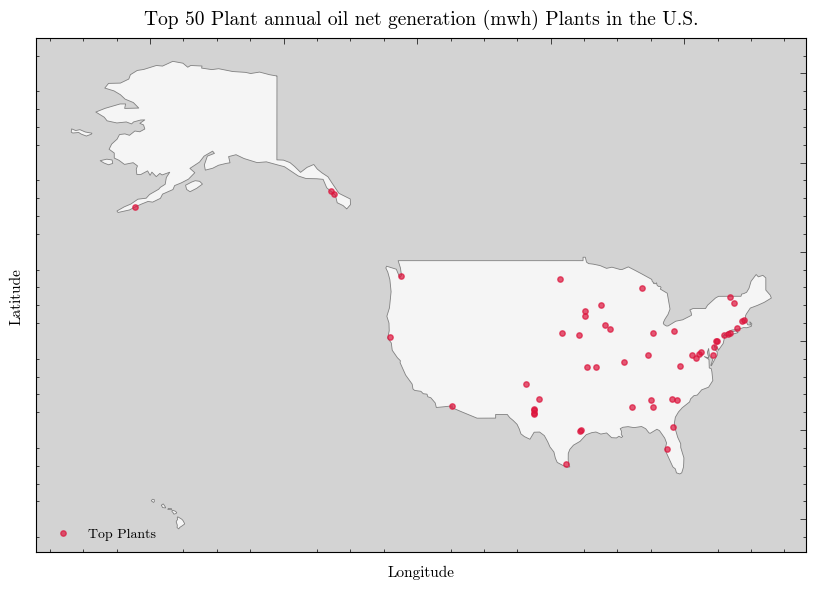

In [22]:
plot_resource('Plant annual oil net generation (MWh)', 50, gdf)

<Axes: title={'center': 'Top 10 Plant annual coal net generation (mwh) Plants in the U.S.'}, xlabel='Longitude', ylabel='Latitude'>

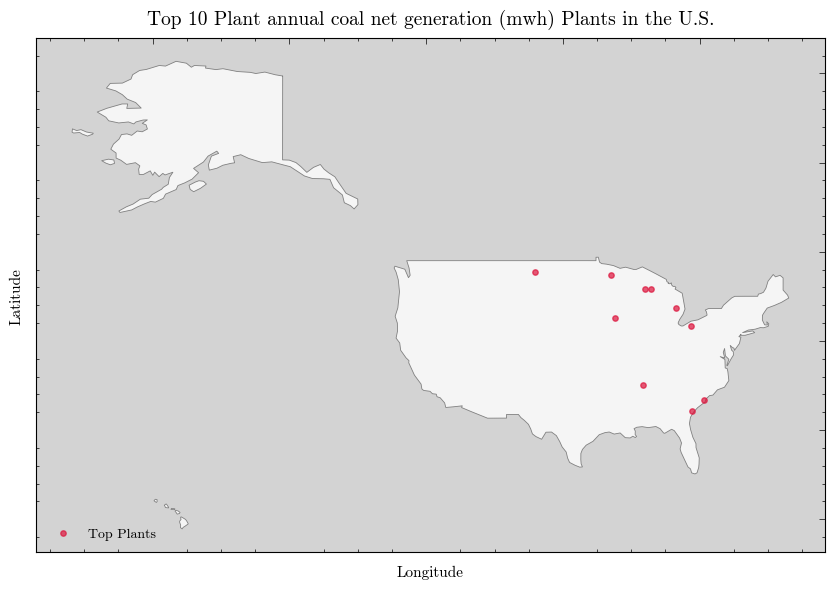

In [23]:
plot_resource('Plant annual coal net generation (MWh)', 50, gdf)

<Axes: title={'center': 'Top 50 Plant annual gas net generation (mwh) Plants in the U.S.'}, xlabel='Longitude', ylabel='Latitude'>

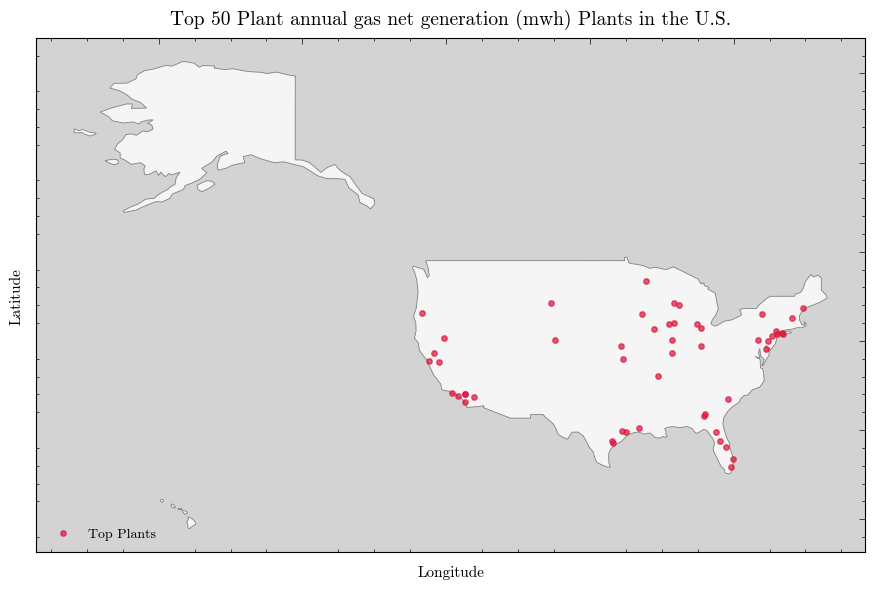

In [24]:
plot_resource('Plant annual gas net generation (MWh)', 50, gdf)

<Axes: title={'center': 'Top 50 Plant annual solar net generation (mwh) Plants in the U.S.'}, xlabel='Longitude', ylabel='Latitude'>

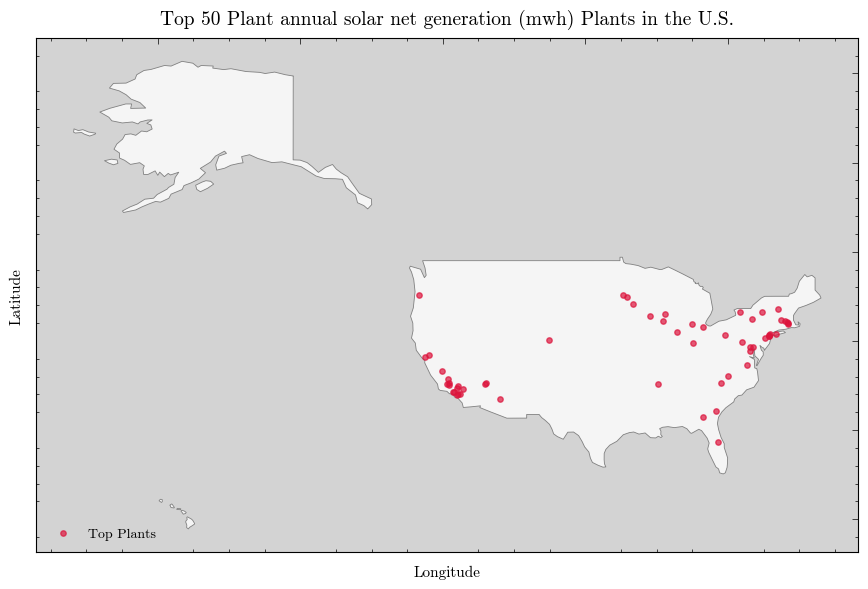

In [25]:
plot_resource('Plant annual solar net generation (MWh)', 50, gdf)

<Axes: title={'center': 'Top 36 Plant annual hydro net generation (mwh) Plants in the U.S.'}, xlabel='Longitude', ylabel='Latitude'>

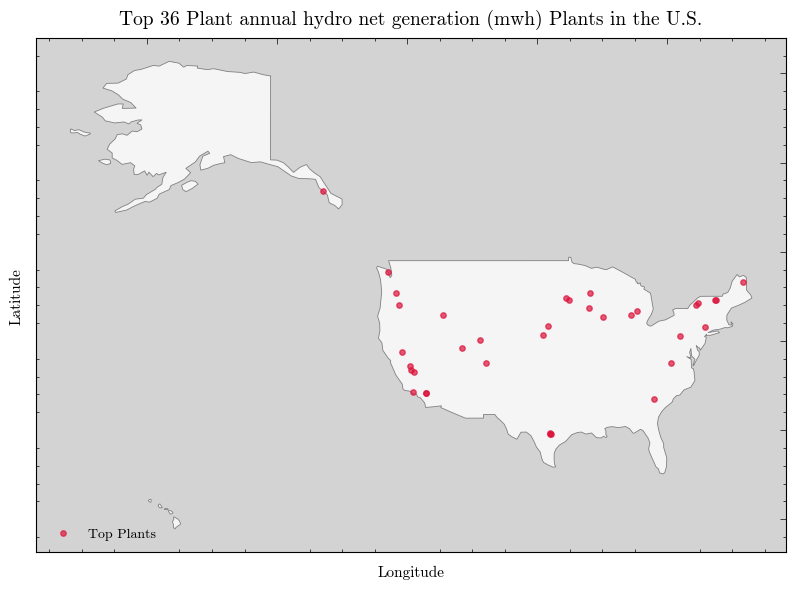

In [26]:
plot_resource('Plant annual hydro net generation (MWh)', 50, gdf)

<Axes: title={'center': 'Top 19 Plant annual wind net generation (mwh) Plants in the U.S.'}, xlabel='Longitude', ylabel='Latitude'>

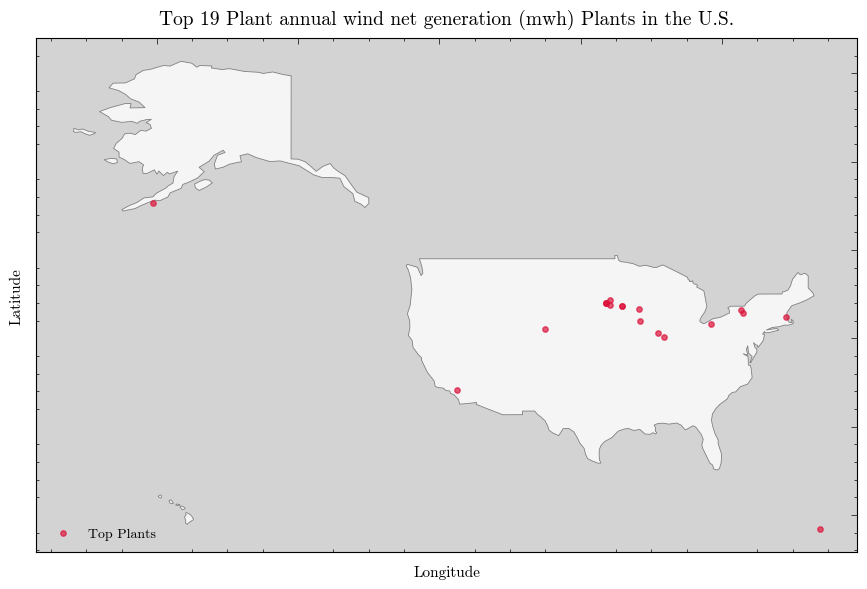

In [27]:
plot_resource('Plant annual wind net generation (MWh)', 50, gdf)

### Identify Clusters

In [29]:
j = gdf[gdf[f'Plant annual solar net generation (MWh)_rank'] != 0].copy()

j.sort_values(by=['Plant annual solar net generation (MWh)'], ascending=False)
j.head()

,Plant state abbreviation,Plant name,Plant transmission or distribution system owner name,Plant longitude,Plant latitude,Plant primary fuel,Plant annual coal net generation (MWh),Plant annual oil net generation (MWh),Plant annual gas net generation (MWh),Plant annual nuclear net generation (MWh),...,Plant annual coal net generation (MWh)_rank,Plant annual oil net generation (MWh)_rank,Plant annual gas net generation (MWh)_rank,Plant annual nuclear net generation (MWh)_rank,Plant annual hydro net generation (MWh)_rank,Plant annual biomass net generation (MWh)_rank,Plant annual wind net generation (MWh)_rank,Plant annual solar net generation (MWh)_rank,Plant annual geothermal net generation (MWh)_rank,geometry
56,0.0,0.0,0.0,-149.790000,61.590000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,216.0,0.0,POINT (-149.79 61.59)
390,0.0,0.0,0.0,-114.067500,35.145833,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,0.0,POINT (-114.0675 35.14583)
392,0.0,0.0,0.0,-114.004591,35.241675,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,POINT (-114.00459 35.24168)
418,0.0,0.0,0.0,-111.984200,33.434500,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,POINT (-111.9842 33.4345)
461,0.0,0.0,0.0,-112.217664,33.447225,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.0,0.0,POINT (-112.21766 33.44722)
